In [1]:
# !pip install -e markov_epidemic

import numpy as np
import scipy
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

from markov_epidemic import *

## SIR Epidemic

Consider a network of $N$ individuals subject to an epidemic disease.
Let $X_i(t)$ be the health state of individual $i$ at time $t$, $0$ being "healthy", 1 being "infected", and $A$ the adjacency matrix of the underlying graph. Let also be $\varepsilon_i(t)\in \{0, 1\}$ a Poisson process starting at $0$ and jumping to $1$ when node $i$ gets infected.

We assume the following random Markov dynamic:

$$
\begin{cases} 
      0 \rightarrow 1 & \text{at rate $\beta\sum_j A_{ij} X_j(t)\mathbb{1}_{\varepsilon_i(t) = 0}$,}  \\
      1 \rightarrow 0 & \text{at rate $\delta$.} \\
   \end{cases}
$$

In other words, the infection rate of an individual is proportional to the number of infected neighbors in the network, and the recovery rate is constant, but once an individual has recovered it can never be infected again. Also we assume only one individual can change state at a given time $t$ (the events of multiple simultaneous transitions has probability zero anyway).

Note that this is a Susceptible-Infected-Removed (SIR) model.

## Network with few connections

/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


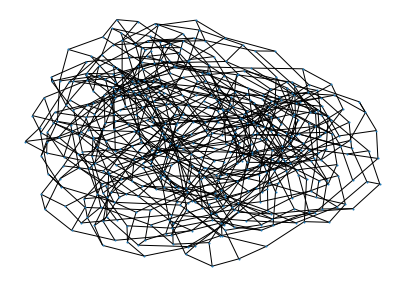

In [2]:
N = 500
G = nx.random_regular_graph(3, N)

# save layout
# pos = nx.shell_layout(G)
pos = nx.spring_layout(G)

fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, node_size=1)
ax.axis('off')

plt.show()

### Epidemic parameters

In [3]:
infection_rate = 1.0
recovery_rate = 2.5
epidemic = MarkovSIR(infection_rate, recovery_rate, G)

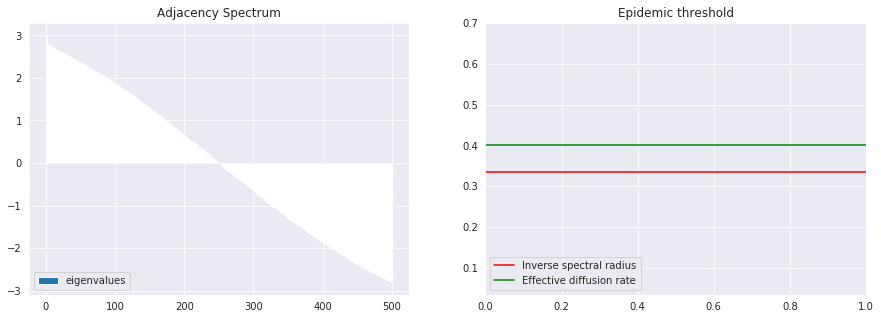

In [4]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)

    ax = axes[0]
    ax.bar(range(1, N+1), epidemic.spectrum, label='eigenvalues')
    ax.set_title('Adjacency Spectrum')
    ax.legend(loc='lower left')
    
    ax = axes[1]
    isr = 1/epidemic.spectral_radius
    edr = epidemic.effective_diffusion_rate
    ax.axhline(y=isr, color='r', label='Inverse spectral radius')
    ax.axhline(y=edr, color='g', label='Effective diffusion rate')
    ax.set_xlim(0, 1)
    ax.set_ylim(np.min((edr, isr))-0.3, np.max((edr, isr))+0.3)
    ax.set_title('Epidemic threshold')
    ax.legend(loc='lower left')

    plt.show()

### Epidemic simulation

In [5]:
T = 10.0
x0 = np.zeros(N)
seed_patients = np.random.choice(G.nodes, size=5, replace=False)
x0[seed_patients] = 1
epidemic.simulate(T, x0)

/home/sauxpa/github/markov_epidemic/markov_epidemic/markov_epidemic/markov_epidemic.py:142: RuntimeWarning: divide by zero encountered in true_divide
  holding_times = np.random.exponential(scale=1/rates)


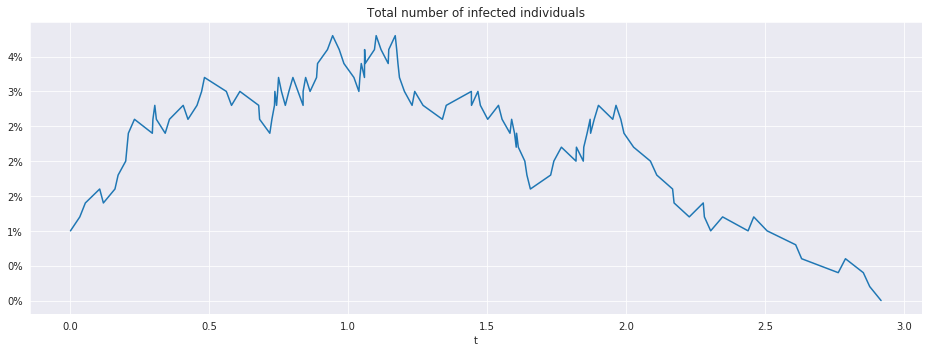

In [6]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(13, 5), nrows=1, ncols=1)

    ax.plot(epidemic.transition_times, epidemic.number_of_infected/epidemic.N)
    ax.set_title('Total number of infected individuals')
    ax.set_xlabel('t')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    plt.tight_layout()
    plt.show()

## Network with more connections

/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


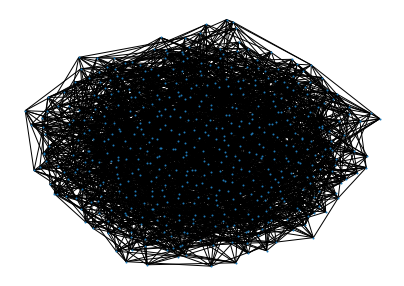

In [7]:
N = 500
G = nx.random_regular_graph(10, N)

# save layout
# pos = nx.shell_layout(G)
pos = nx.spring_layout(G)

fig, ax = plt.subplots(figsize=(7, 5), nrows=1, ncols=1)

nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, node_size=1)
ax.axis('off')

plt.show()

### Epidemic parameters

In [8]:
infection_rate = 1.0
recovery_rate = 2.5
epidemic = MarkovSIR(infection_rate, recovery_rate, G)

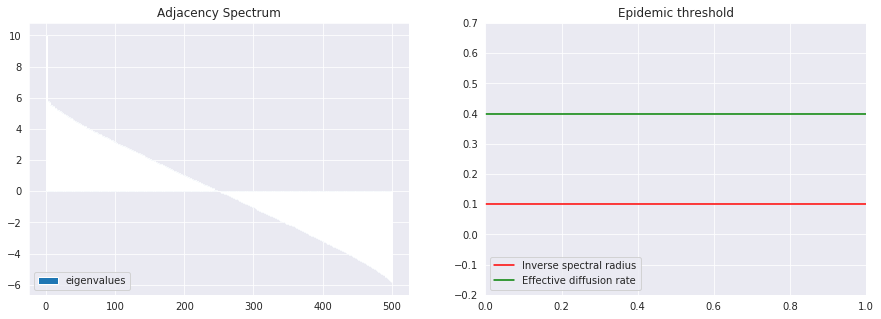

In [9]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)

    ax = axes[0]
    ax.bar(range(1, N+1), epidemic.spectrum, label='eigenvalues')
    ax.set_title('Adjacency Spectrum')
    ax.legend(loc='lower left')
    
    ax = axes[1]
    isr = 1/epidemic.spectral_radius
    edr = epidemic.effective_diffusion_rate
    ax.axhline(y=isr, color='r', label='Inverse spectral radius')
    ax.axhline(y=edr, color='g', label='Effective diffusion rate')
    ax.set_xlim(0, 1)
    ax.set_ylim(np.min((edr, isr))-0.3, np.max((edr, isr))+0.3)
    ax.set_title('Epidemic threshold')
    ax.legend(loc='lower left')

    plt.show()

### Epidemic simulation

In [10]:
infection_rate = 1.0
recovery_rate = 2.5
epidemic = MarkovSIR(infection_rate, recovery_rate, G)

T = 10.0
x0 = np.zeros(N)
seed_patients = np.random.choice(G.nodes, size=5, replace=False)
x0[seed_patients] = 1
epidemic.simulate(T, x0)

/home/sauxpa/github/markov_epidemic/markov_epidemic/markov_epidemic/markov_epidemic.py:142: RuntimeWarning: divide by zero encountered in true_divide
  holding_times = np.random.exponential(scale=1/rates)


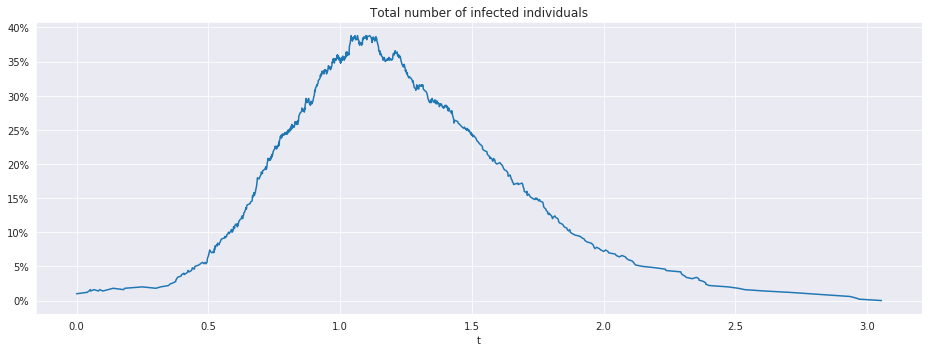

In [11]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(13, 5), nrows=1, ncols=1)

    ax.plot(epidemic.transition_times, epidemic.number_of_infected/epidemic.N)
    ax.set_title('Total number of infected individuals')
    ax.set_xlabel('t')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    plt.tight_layout()
    plt.show()